In [17]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [18]:
# read processed weather file
weather_df=pd.read_csv('../data/processed/WEATHER_PROCESSED.csv')
weather_df.head(3)

,DATE,STN,STATION NAME,COUNTRY NAME,LAT,LON,TEMP,DEWP,SLP,STP,...,Season,TempChange,WindCategory,VisibilityCategory,Fog,Rain,Snow,Hail,Thunder,Tornado
0,1929-10-01,30050,LERWICK,UNITED KINGDOM,60.133,-1.183,7.39,40.0,1001.6,9999.9,...,Autumn,3.89,Low,Moderate,0,NaN,NaN,NaN,NaN,NaN
1,1929-10-02,30050,LERWICK,UNITED KINGDOM,60.133,-1.183,9.72,45.2,977.6,9999.9,...,Autumn,5.00,High,Low,1,0.0,0.0,0.0,0.0,NaN
2,1929-10-03,30050,LERWICK,UNITED KINGDOM,60.133,-1.183,9.44,41.7,975.7,9999.9,...,Autumn,3.94,Medium,Moderate,1,0.0,0.0,0.0,0.0,NaN


In [19]:
# get year
weather_df['VisibilityCategory']=weather_df['VisibilityCategory'].astype(str)
weather_df['WindCategory']=weather_df['WindCategory'].astype(str)
weather_df['TEMP']=round(weather_df['TEMP'],2)
weather_df['Year']=pd.to_datetime(weather_df['DATE']).dt.year

In [20]:
# aggregate based on date
grouped_by_date=weather_df.groupby('DATE').agg({
    'Year':'max',
    "TEMP":"mean",
    'VISIB':'mean',
    'TempChange':"mean",
    'WindCategory':'max',
    'VisibilityCategory':'max'
}).reset_index()
grouped_by_date['TEMP']=round(grouped_by_date['TEMP'],2)
grouped_by_date['VISIB']=round(grouped_by_date['VISIB'],2)
grouped_by_date['TempChange']=round(grouped_by_date['TempChange'],2)
grouped_by_date.head(3)

,DATE,Year,TEMP,VISIB,TempChange,WindCategory,VisibilityCategory
0,1929-08-01,1929,14.56,6.7,6.07,High,Very Low
1,1929-08-02,1929,13.29,4.8,7.90,Medium,Very Low
2,1929-08-03,1929,13.70,6.7,7.26,Medium,Very Low


In [21]:
# save the data
grouped_by_date.to_csv('../data/aggregated/aggregated_by_date.csv',index=False)

In [22]:
# aggregate based on year
grouped_by_year=weather_df.groupby('Year').agg({
    "TEMP":"mean",
    'VISIB':'mean',
    'TempChange':"mean",
}).reset_index()

# applying the dense rank to create the color for the bar graph
grouped_by_year['Rank'] = grouped_by_year['TEMP'].rank(ascending=False, method='dense')
grouped_by_year['TEMP']=round(grouped_by_year['TEMP'],2)
grouped_by_year['VISIB']=round(grouped_by_year['VISIB'],2)
grouped_by_year['TempChange']=round(grouped_by_year['TempChange'],2)
grouped_by_year.head(3)

,Year,TEMP,VISIB,TempChange,Rank
0,1929,9.58,6.97,8.20,77.0
1,1930,9.92,7.05,6.80,69.0
2,1931,9.79,9.17,3.76,73.0


In [23]:
def assign_color(row):
    if row==1:
        return 'red'
    elif row==2:
        return 'orange'
    elif row==grouped_by_year['Rank'].max():
        return 'green'
    else:
        return 'gray'

# assing the colors to highlight the highest, second highest and lowest temprature bar
grouped_by_year['Colors']=grouped_by_year['Rank'].apply(lambda row: 'red' if row == 1 else ('orange' if row == 2 else ('green' if row == grouped_by_year['Rank'].max() else 'gray')))

In [24]:
# save the data
grouped_by_year.to_csv('../data/aggregated/aggregated_by_year.csv',index=False)

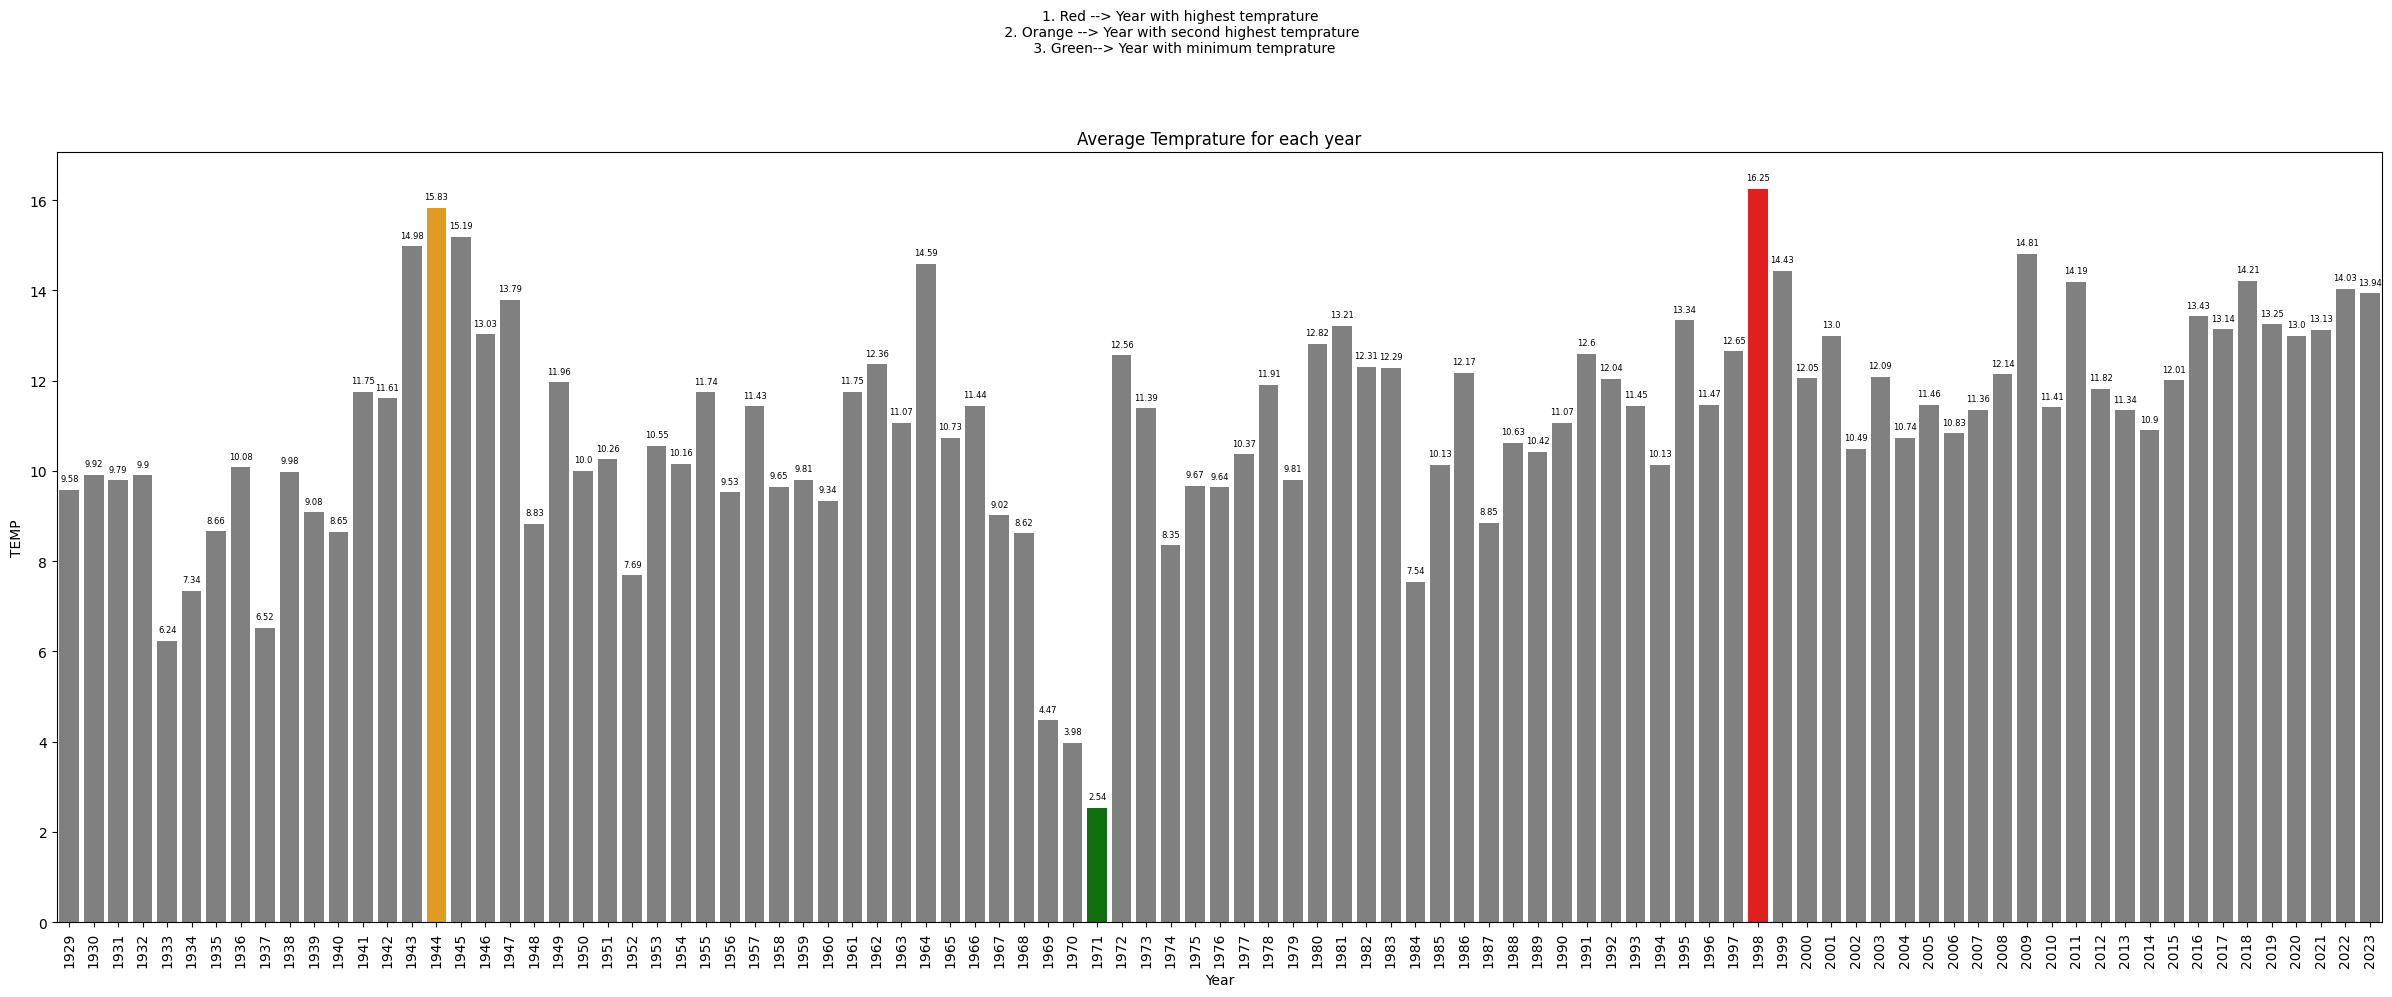

In [25]:
plt.figure(figsize =(30, 10)) 

# Plot the bar chart with the specified color palette
plots=sns.barplot(x="Year", y="TEMP", data=grouped_by_year, palette=grouped_by_year['Colors'].tolist())

# plots.annotate(...): This function is used to annotate each bar with its height. It adds a text label to each bar, displaying its height.
# format(bar.get_height(), ''): Formats the height of the bar as a string.
# (bar.get_x() + bar.get_width() / 2, bar.get_height()): Specifies the position where the text label will be placed, which is at the top center of each bar.
# ha='center', va='center': Aligns the text label at the center of the specified position.
# size=6: Sets the font size of the text label to 6 points.
# xytext=(0, 8): Offsets the text label by (0, 8) points from the specified position.
# textcoords='offset points': Specifies that the positioning is done using offset points.

for bar in plots.patches: 
    plots.annotate(format(bar.get_height(), ''),  
                (bar.get_x() + bar.get_width() / 2,  
                bar.get_height()),ha='center', va='center', 
                size=6, xytext=(0, 8), 
                textcoords='offset points')
plt.title('Average Temprature for each year')
plt.text(0.5, 1, '1. Red --> Year with highest temprature \n 2. Orange --> Year with second highest temprature \n 3. Green--> Year with minimum temprature', size=10, ha='center', va='center', transform=plt.gcf().transFigure)
plt.xticks(rotation=90)
plt.show()

In [26]:
# aggregate based on date and seasons
grouped_by_seasons=weather_df.groupby(['Season',"Year"]).agg({
    "TEMP":"mean",
    'VISIB':'mean',
    'TempChange':"mean",
}).reset_index()
grouped_by_seasons['TEMP']=round(grouped_by_seasons['TEMP'],2)
grouped_by_seasons['VISIB']=round(grouped_by_seasons['VISIB'],2)
grouped_by_seasons['TempChange']=round(grouped_by_seasons['TempChange'],2)
grouped_by_seasons.head(5)

,Season,Year,TEMP,VISIB,TempChange
0,Autumn,1929,9.98,7.28,10.02
1,Autumn,1930,10.71,7.26,5.17
2,Autumn,1931,10.11,7.92,3.74
3,Autumn,1932,10.29,8.87,10.40
4,Autumn,1933,6.70,7.06,21.75


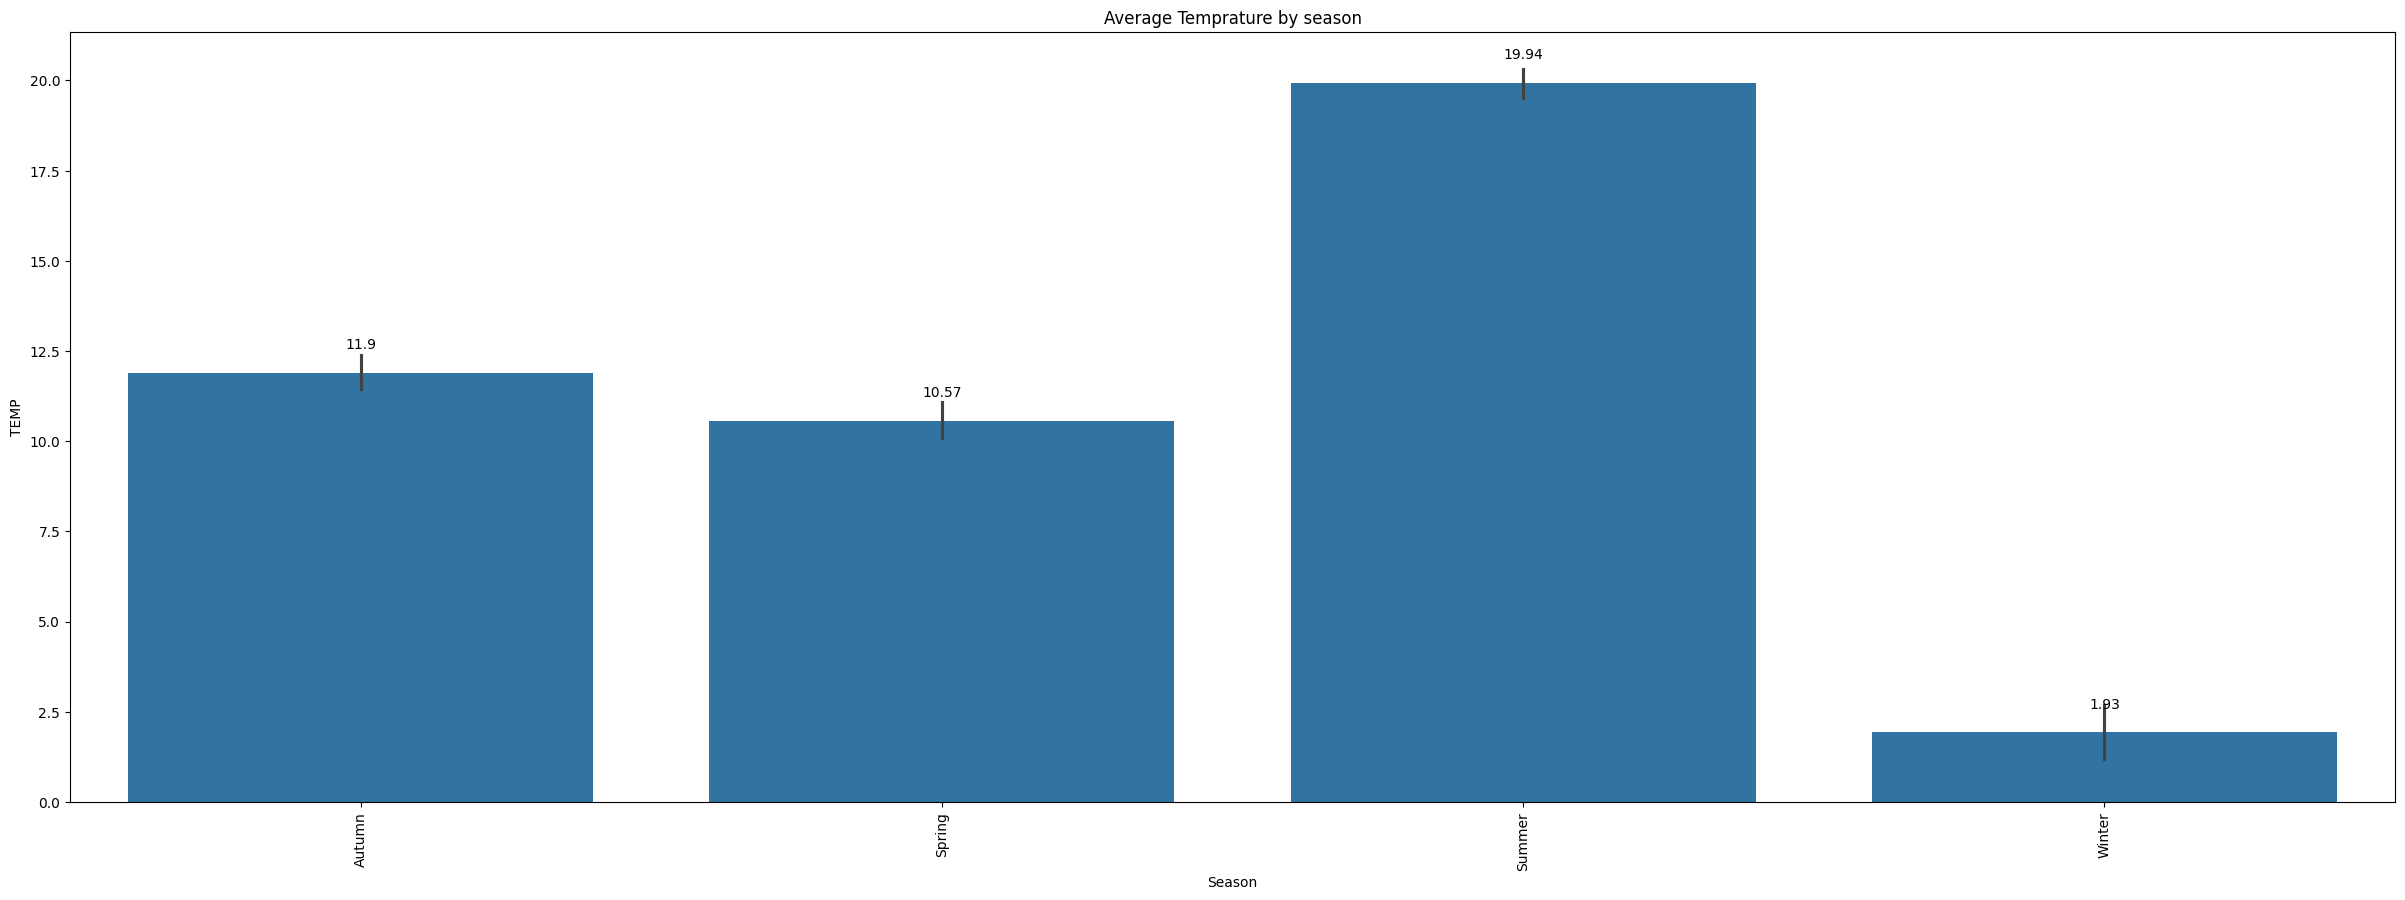

In [27]:
plt.figure(figsize =(30, 10)) 

# Plot the bar chart with the specified color palette
plots=sns.barplot(x="Season", y="TEMP", data=grouped_by_seasons)

for bar in plots.patches: 
    plots.annotate(format(round(bar.get_height(),2), ''),  
                (bar.get_x() + bar.get_width() / 2,  
                bar.get_height()),ha='center', va='center', 
                size=10, xytext=(0, 20), 
                textcoords='offset points')
plt.title('Average Temprature by season')
plt.xticks(rotation=90)
plt.show()

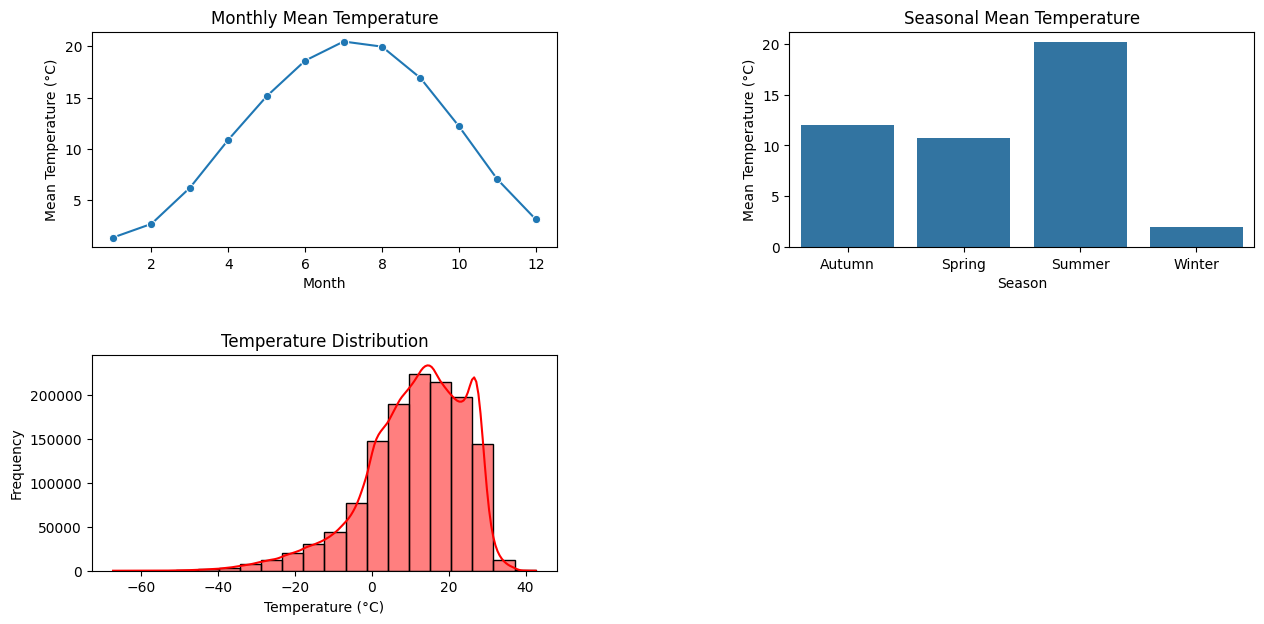

In [28]:
try:
    # Monthly trends
    weather_df['Month'] = pd.to_datetime(weather_df['DATE']).dt.month
    monthly_mean_temp = weather_df.groupby('Month')['TEMP'].mean().reset_index()

    # Seasonal trends 
    seasonal_mean_temp = weather_df.groupby('Season')['TEMP'].mean().reset_index()

    # set the graph size
    plt.figure(figsize=(15, 7))

    # subplot(row, columns, first plot)
    plt.subplot(2, 2, 1)
    sns.lineplot(x='Month', y='TEMP', data=monthly_mean_temp, marker='o')
    plt.title('Monthly Mean Temperature')
    plt.xlabel('Month')
    plt.ylabel('Mean Temperature (°C)')

    plt.subplot(2, 2, 2)
    sns.barplot(x='Season', y='TEMP', data=seasonal_mean_temp)
    plt.title('Seasonal Mean Temperature')
    plt.xlabel('Season')
    plt.ylabel('Mean Temperature (°C)')

    # 2. Temperature Distribution
    plt.subplot(2, 2, 3)
    sns.histplot(weather_df['TEMP'], bins=20, kde=True,color='red')
    plt.title('Temperature Distribution')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Frequency')


    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.show()
except Exception as e:
    raise e

In [35]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

geo_df = weather_df[weather_df['Year']==2023].groupby('STATION NAME').agg({'TEMP':'mean','LAT':'max','LON':'max','COUNTRY NAME':'max'}).reset_index()
geo_df['TEMP']=round(geo_df['TEMP'],2)
geo_df['Rank']=geo_df['TEMP'].rank(ascending=False, method='dense')
geo_df['text'] = geo_df['STATION NAME'] + ' ' + geo_df['COUNTRY NAME'] + '-->' + geo_df['TEMP'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        text = geo_df['text'],
        lat = geo_df['LAT'],
        lon = geo_df['LON'],
        mode = 'markers',
        marker_color = geo_df['Rank'],
        ))

fig.update_layout(
        geo_scope='world',
        geo = dict(resolution = 110),
        height=600,  # Set the desired height
        width=1400,  # Set the desired width
    )
fig.show()